<a href="https://colab.research.google.com/github/sharonwanjiru/NLPProject/blob/main/DrugRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
#import csv
from google.colab import drive

import string
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Uploading Dataset**


In [2]:
upload = "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTrain_raw.csv"

All Medications


In [4]:

data = pd.read_csv((upload))
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
data.shape

(161297, 7)

Pain Medication

In [5]:
painMedication = data[data.condition == 'Pain']
painMedication.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
32,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10,11-Feb-13,16
37,93678,Morphine,Pain,"""I have been on morphine for at least 7 years....",8,8-May-10,19
52,69629,Buprenorphine,Pain,"""My pain management doctor put me on Butrans p...",8,24-Jun-11,125
62,69488,Buprenorphine,Pain,"""I love my Butrans patch!!! And it has relieve...",10,6-Aug-15,47
108,57623,Acetaminophen / hydrocodone,Pain,"""I suffer from chronic pain due to severe arth...",8,6-Dec-16,3


In [7]:
painMedication.shape

(6145, 7)

Data Descriptions

In [13]:
#Unique data features
print("Number of unique drugs in the Dataset :", data['drugName'].nunique())
print("Number of unique conditions present in the Dataset :", data['condition'].nunique())
print("...................................................... :")
data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(5)
#data('condition')['drugName'].nunique().sort_values(ascending=False).head(5)
print("The number of pain drugs reviews :" ,data.condition.value_counts().Pain)
print("Number of Unique pain Drugs present in the Dataset :", painMedication['drugName'].nunique())
print("Number of unique attributes in the pain ailment :", painMedication.nunique())


Number of unique drugs in the Dataset : 3436
Number of unique conditions present in the Dataset : 884
...................................................... :
The number of pain drugs reviews : 6145
Number of Unique pain Drugs present in the Dataset : 200
Number of unique attributes in the pain ailment : uniqueID       6145
drugName        200
condition         1
review         4448
rating           10
date           2402
usefulCount     217
dtype: int64


In [8]:
#Description of all data
data.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [9]:
#description of pain medication data
painMedication.describe()

,uniqueID,rating,usefulCount
count,6145.000000,6145.000000,6145.000000
mean,101148.205696,7.632221,35.574451
std,64265.560983,2.928199,41.951497
min,1469.000000,1.000000,0.000000
25%,47435.000000,7.000000,12.000000
50%,90213.000000,9.000000,23.000000
75%,152625.000000,10.000000,44.000000
max,231175.000000,10.000000,485.000000


In [10]:
#checking for null values
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [14]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [16]:
#Drop all the null values for conditions 
data = data.dropna()
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [12]:
#checking for null values in all medications
painMedication.isnull().any()


uniqueID       False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

Text(0.5, 1.0, 'The number of drugs top 5 conditions')

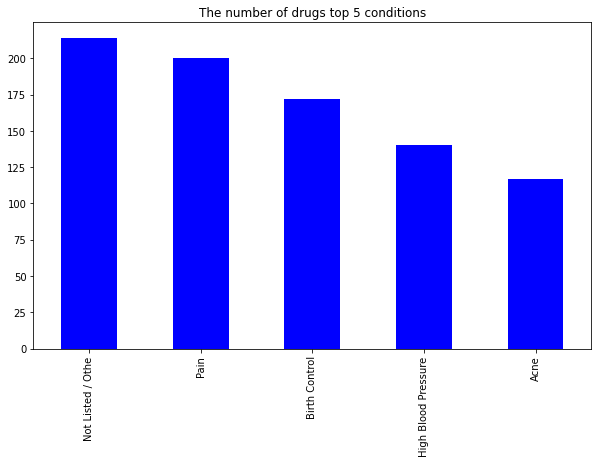

In [17]:
#Top Conditions
condition_top = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_top[0:5].plot(kind="bar", figsize = (10,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 12)
plt.ylabel("", fontsize = 12)
plt.title("The number of drugs top 5 conditions", fontsize = 12)

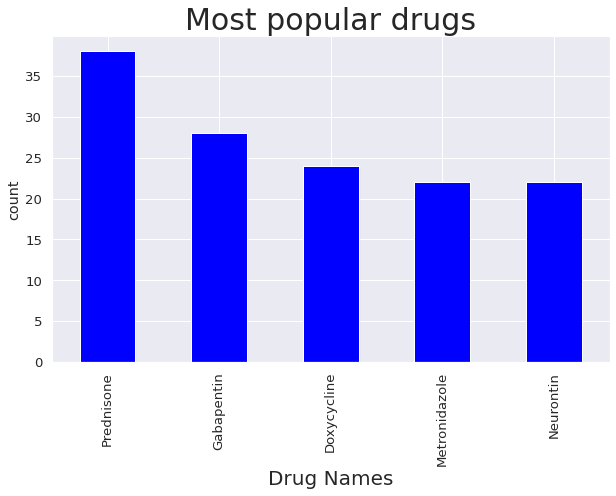

In [25]:
# checking the most popular drugs per conditions
data.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(5).plot.bar(figsize = (10,6), color = 'blue')
plt.title('Most popular drugs', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()


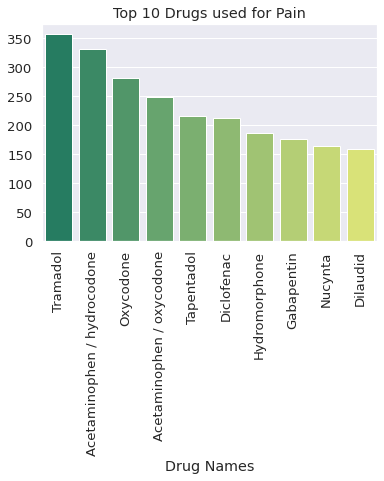

In [18]:
#Top ten drugs used for Pain
df1 = data[data['condition'] == 'Pain']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

In [27]:
data['review'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

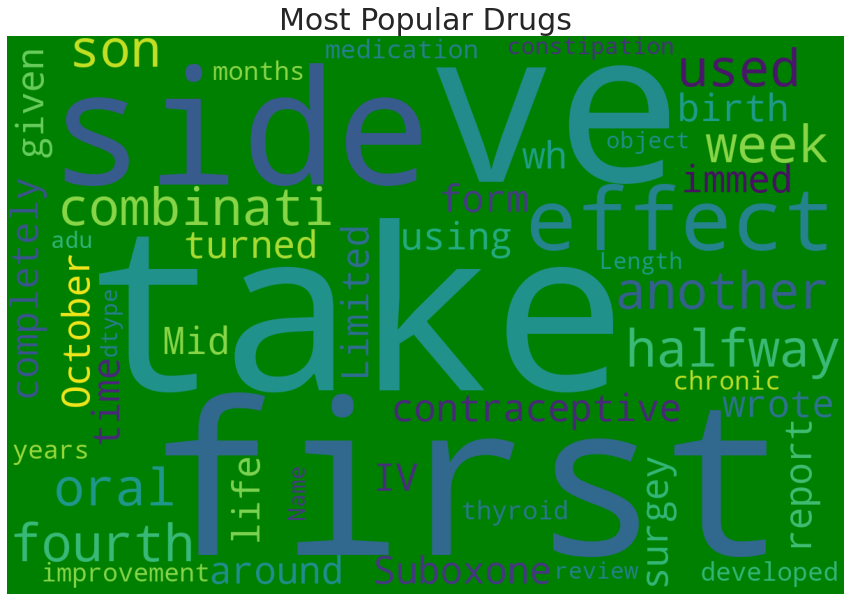

In [28]:
#world clod for reviews for popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'green', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()